In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('mnist_train.csv')
train = pd.DataFrame(train)

test = pd.read_csv('mnist_test.csv')
test = pd.DataFrame(test)

x_train = pd.read_csv('x_train.csv')
X_train = pd.DataFrame(x_train)

y_train = pd.read_csv('y_train.csv')
Y_train = pd.DataFrame(y_train)

X_train = X_train.values
Y_train = Y_train.values

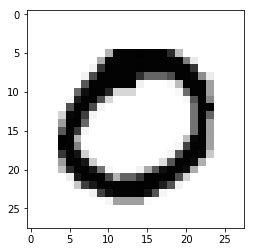

In [5]:
plt.imshow(X_train[0].reshape(28, 28), cmap='Greys')
plt.show()

In [6]:
X_train.shape

(60000, 784)

In [7]:
Y_train[0]

array([0], dtype=int64)

In [8]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X_train)
print(standardized_data.shape)

C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(60000, 784)


In [9]:
sample_data_X_train = standardized_data

In [10]:
co_variance_matrix = np.matmul(sample_data_X_train.T, sample_data_X_train)
co_variance_matrix.shape

(784, 784)

In [11]:
from scipy.linalg import eigh

eigen_values, eigen_vectors = eigh(co_variance_matrix, eigvals=(782,783))
print("Shape of eigen vectors = ",eigen_vectors.shape)

Shape of eigen vectors =  (784, 2)


In [13]:
new_coordinates = np.matmul(eigen_vectors.T, X_train.T)

print (" resultant new data points' shape ", eigen_vectors.T.shape, "X", X_train.T.shape," = ", new_coordinates.shape)

 resultant new data points' shape  (2, 784) X (784, 60000)  =  (2, 60000)


In [14]:
Y_train.shape

(60000, 1)

In [15]:
new_coordinates = np.vstack((new_coordinates, Y_train.T)).T

dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0     -45.151800    2178.717319    0.0
1     269.699527    1384.657584    0.0
2    -801.770856    1149.932309    0.0
3    -292.724621    1232.936416    0.0
4    -260.958346    2199.166346    0.0


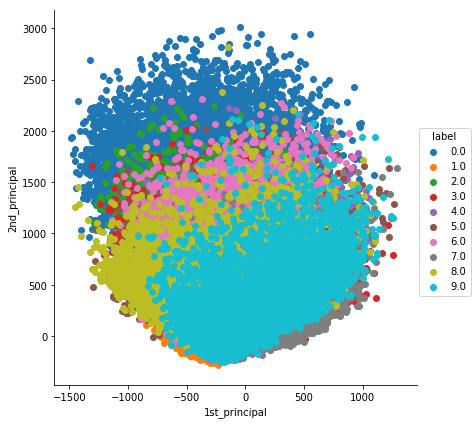

In [16]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

PCA using Scikit-Learn

In [17]:
from sklearn import decomposition
pca = decomposition.PCA()

In [18]:
pca.n_components = 2
pca_data = pca.fit_transform(X_train)

print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (60000, 2)


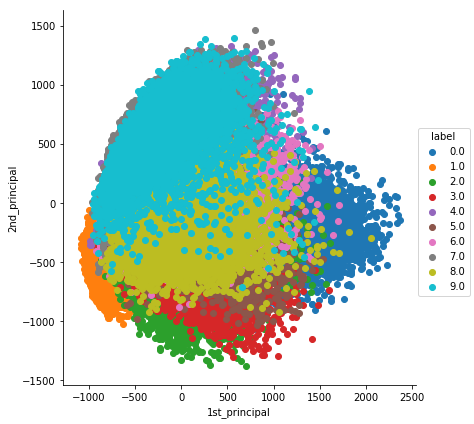

In [19]:
pca_data = np.vstack((pca_data.T, Y_train.T)).T

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

PCA for not Visualization

In [21]:
from sklearn import decomposition
pca = decomposition.PCA()

In [34]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data_X_train)

In [35]:
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

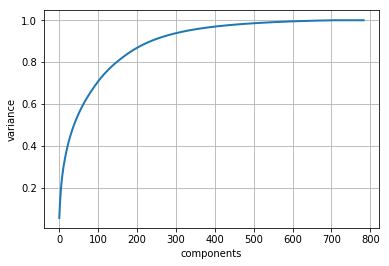

In [36]:
plt.plot(cum_var_explained, linewidth=2)
plt.xlabel('components')
plt.ylabel('variance')
plt.grid()
plt.show()

In [38]:
pca_data.shape

(60000, 784)